# Panas II Series

In [2]:
revenues = pd.Series([555,7000,1980])
revenues

0     555
1    7000
2    1980
dtype: int64

In [3]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [4]:
city_revenues = pd.Series([555,7000,1980],index=['Amsterdam','Tokyo','Beijing'])
city_revenues

Amsterdam     555
Tokyo        7000
Beijing      1980
dtype: int64

In [5]:
city_employee_count = pd.Series({'Amsterdam':5,'Tokyo':8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [6]:
city_data = pd.DataFrame({'revenue':city_revenues,'employee_count':city_employee_count})
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


In [7]:
city_data.columns

Index(['revenue', 'employee_count'], dtype='object')

In [8]:
city_data.index

Index(['Amsterdam', 'Beijing', 'Tokyo'], dtype='object')

# Concat dan Merge

In [9]:
further_city_data = pd.DataFrame({'revenue':[7000,3400],'employee_count':[2,2]},index=['New York','Barcelona'])
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [10]:
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


# Concat Vertical

In [12]:
all_city_data = pd.concat([city_data,further_city_data])
all_city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0
New York,7000,2.0
Barcelona,3400,2.0


# Concat Horizontal

In [13]:
city_countries = pd.DataFrame({'country':['Holland','Japan','Holland','Canada','Spain'],
                              'capital':[1,1,0,0,0]},
                             index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [14]:
pd.concat([all_city_data,city_countries],axis=1,join='inner')
#join inner hanya menampilkan data yang ada pada concat

,revenue,employee_count,country,capital
Amsterdam,555,5.0,Holland,1
Tokyo,7000,8.0,Japan,1
Barcelona,3400,2.0,Spain,0


In [18]:
cities = pd.concat([all_city_data,city_countries],axis=1)
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


# Merge

In [15]:
countries = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America']},index=['Holland','Japan','Canada'])
countries

,population_mil,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [16]:
countries2 = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America'],
                          'country':['Holland','Japan','Canada']})
countries2

,population_mil,continent,country
0,17,Europe,Holland
1,127,Asia,Japan
2,37,North America,Canada


In [19]:
cities.merge(countries2,on='country',how='inner')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


In [20]:
cities.merge(countries2,on='country',how='left')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,1980.0,NaN,NaN,NaN,NaN,NaN
2,7000.0,8.0,Japan,1.0,127.0,Asia
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,3400.0,2.0,Spain,0.0,NaN,NaN
5,NaN,NaN,Holland,0.0,17.0,Europe
6,NaN,NaN,Canada,0.0,37.0,North America


In [21]:

cities.merge(countries2,on='country',how='right')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


In [22]:
cities.merge(countries2,on='country',how='outer')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,NaN,NaN,Holland,0.0,17.0,Europe
2,1980.0,NaN,NaN,NaN,NaN,NaN
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,7000.0,8.0,Japan,1.0,127.0,Asia
5,3400.0,2.0,Spain,0.0,NaN,NaN
6,NaN,NaN,Canada,0.0,37.0,North America


# Data Cleaning with Pandas

In [23]:
#Quis
df['SQ_FT'].fillna(df['SQ_FT'].mean(),inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,1100.0
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [1]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [15]:
df.head(10)


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


## Standard Missing Value

In [10]:
#Pandas dapat mendeksi missing value atau nilai yang lkosong 
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [11]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [16]:
#mencari semua kolom yang n/a
df.isna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


## Non-Standard Missing Value

In [14]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [15]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [21]:
missing_values = ["n/a", "na", "--"]

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)

In [18]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [19]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

## Unexpected Missing Values

In [20]:
# Bari keempat merupakan missing value karena seharusnya bernilai Y/N
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [21]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [22]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [23]:
df.head(9)


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Summarizing Missing Values

In [24]:
# Melihat jumlah total missing value
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [25]:
# Melihat apakah ada missing value yang hilang
df.isnull().values.any()

True

In [26]:
df.isnull().sum().sum()


12

## Replacing Missing Value

In [27]:
df.ST_NUM.fillna(125, inplace=True)

In [28]:
df.loc[2,'ST_NUM'] = 25

In [29]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [30]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,25.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Analyzing Obesity in England

In [24]:
%matplotlib inline
data = pd.ExcelFile('D:MSIB/Data/obes.xls')

In [25]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [26]:
data_age = data.parse(u'7.2',skiprows=4,skipfooter=14)

In [27]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [33]:
data_age.rename(columns={u'Unnamed: 0': u'Year'},inplace=True)

In [34]:
data_age.dropna(inplace=True)

In [35]:
data_age.set_index('Year',inplace=True)

In [32]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

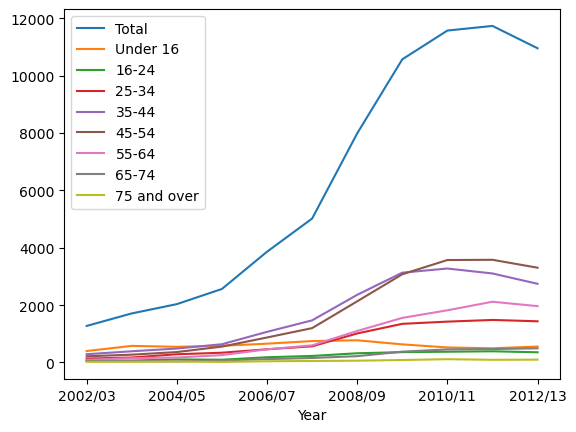

In [17]:
data_age.plot()

In [36]:
data_age_minus_total = data_age.drop('Total',axis=1)

<AxesSubplot:xlabel='Year'>

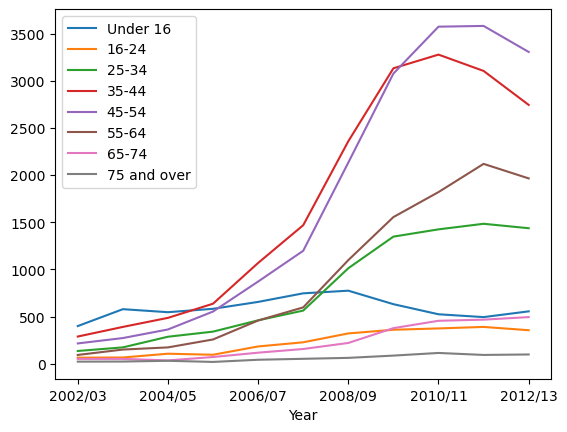

In [37]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

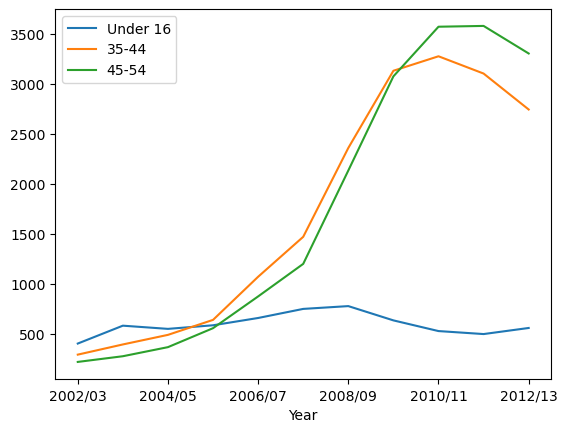

In [39]:
# apakah bisa melihat kelompok usia individu?
data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label='35-44', legend=True)
data_age['45-54'].plot(label='45-54', legend=True)

Disimpulkan bahwa umur 45-64 merupakan range umur yang rentan untuk terkena obesitas setiap tahun

## Time Series

In [42]:
from datetime import datetime

In [43]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H') #H = hour (per jam)

In [44]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [25]:
# Contoh membuat data frame
df = pd.DataFrame(date_rng, columns=['date'])

In [26]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [27]:
df.head()

,date,data
0,2020-01-01 00:00:00,66
1,2020-01-01 01:00:00,57
2,2020-01-01 02:00:00,47
3,2020-01-01 03:00:00,41
4,2020-01-01 04:00:00,68


In [28]:
# Mengkonversi data frame menjadi datetime index
df['datetime'] = pd.to_datetime(df['date'])

In [29]:
df = df.set_index('datetime')

In [30]:
df.drop(['date'],axis=1,inplace=True)

In [31]:
df.head()

,data
datetime,
2020-01-01 00:00:00,66
2020-01-01 01:00:00,57
2020-01-01 02:00:00,47
2020-01-01 03:00:00,41
2020-01-01 04:00:00,68


In [32]:
# Mengubah date_rng menjadi list of string
string_date_rng=[str(x) for x in date_rng]

In [33]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [34]:
# Pertama melihat formatnya lalu nilainya
timestamp_date_rng = pd.to_datetime(string_date_rng,infer_datetime_format=True)

In [35]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [36]:
string_date_rng_2 = ['June-01-2020','June-02-2020','June-03-2020']

In [37]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2 ]

In [38]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [40]:
# Memasukkan data diatas kedalam data frame
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [41]:
df[df.index.day ==2]

,data
datetime,
2020-01-02 00:00:00,61
2020-01-02 01:00:00,50
2020-01-02 02:00:00,64
2020-01-02 03:00:00,68
2020-01-02 04:00:00,46
2020-01-02 05:00:00,8
2020-01-02 06:00:00,94
2020-01-02 07:00:00,78
2020-01-02 08:00:00,21


In [ ]:
df['2020-01-03']

In [44]:
df['2020-01-04' : '2020-01-06']

,data
datetime,
2020-01-04 00:00:00,36
2020-01-04 01:00:00,4
2020-01-04 02:00:00,46
2020-01-04 03:00:00,75
2020-01-04 04:00:00,62
...,...
2020-01-06 19:00:00,21
2020-01-06 20:00:00,40
2020-01-06 21:00:00,41


In [45]:
df.resample('D').mean()

,data
datetime,
2020-01-01,52.083333
2020-01-02,58.416667
2020-01-03,44.708333
2020-01-04,40.708333
2020-01-05,53.125000
2020-01-06,52.125000
2020-01-07,49.625000
2020-01-08,77.000000


In [ ]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [50]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,66,NaN
2020-01-01 01:00:00,57,NaN
2020-01-01 02:00:00,47,170.0
2020-01-01 03:00:00,41,145.0
2020-01-01 04:00:00,68,156.0


## Time Series

In [51]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [52]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [53]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [54]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [55]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [56]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [57]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [58]:
## Menambahkan komponen tahun, bulan, hari
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [59]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [60]:
# Mmeilih data
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [61]:
#Slicing
opsd_daily.loc['2014-01-20': '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [62]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


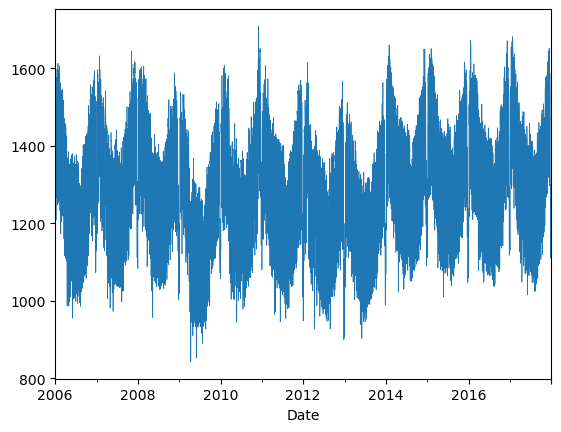

In [63]:
# Membuat line plot
opsd_daily['Consumption'].plot(linewidth=0.5);

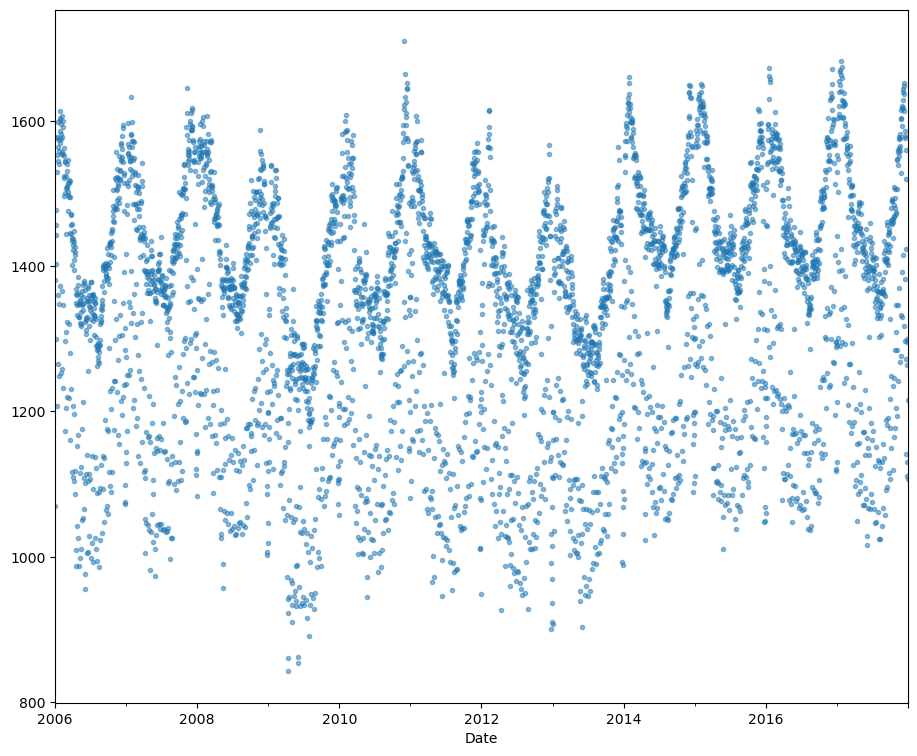

In [64]:
# Mmebuat plot titik-titik
opsd_daily['Consumption'].plot(marker='.',alpha=0.5, linestyle='None', figsize=(11,9));

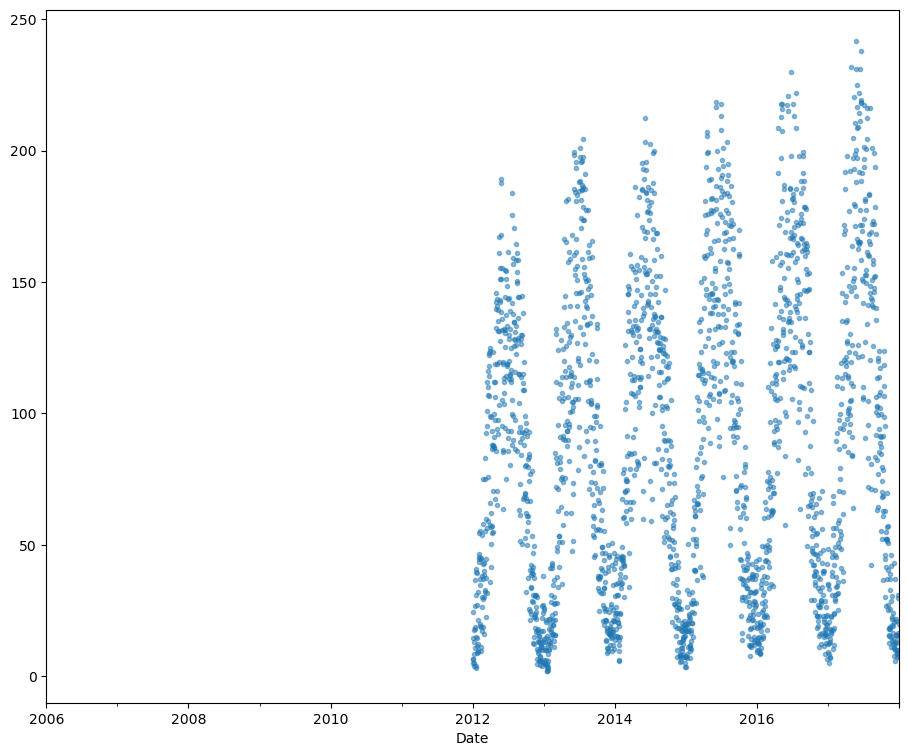

In [65]:
opsd_daily['Solar'].plot(marker='.',alpha=0.5, linestyle='None', figsize=(11,9));

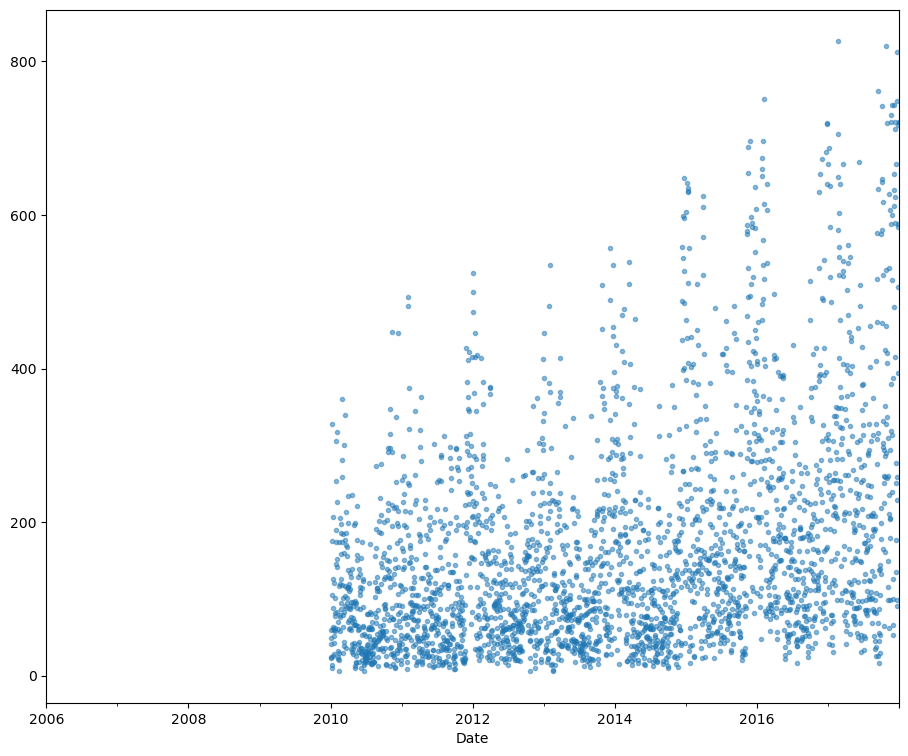

In [66]:
opsd_daily['Wind'].plot(marker='.',alpha=0.5, linestyle='None', figsize=(11,9));

Text(0, 0.5, 'Daily Comsumption (Gwh)')

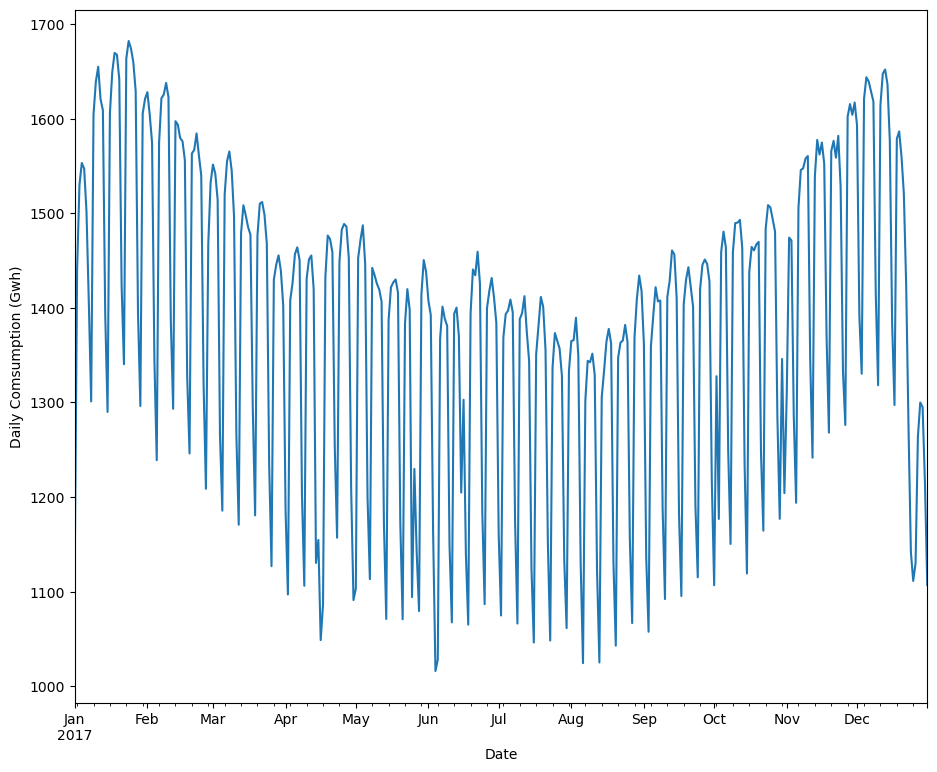

In [67]:
ax = opsd_daily.loc['2017','Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Comsumption (Gwh)')

Text(0, 0.5, 'Daily Comsumption (Gwh)')

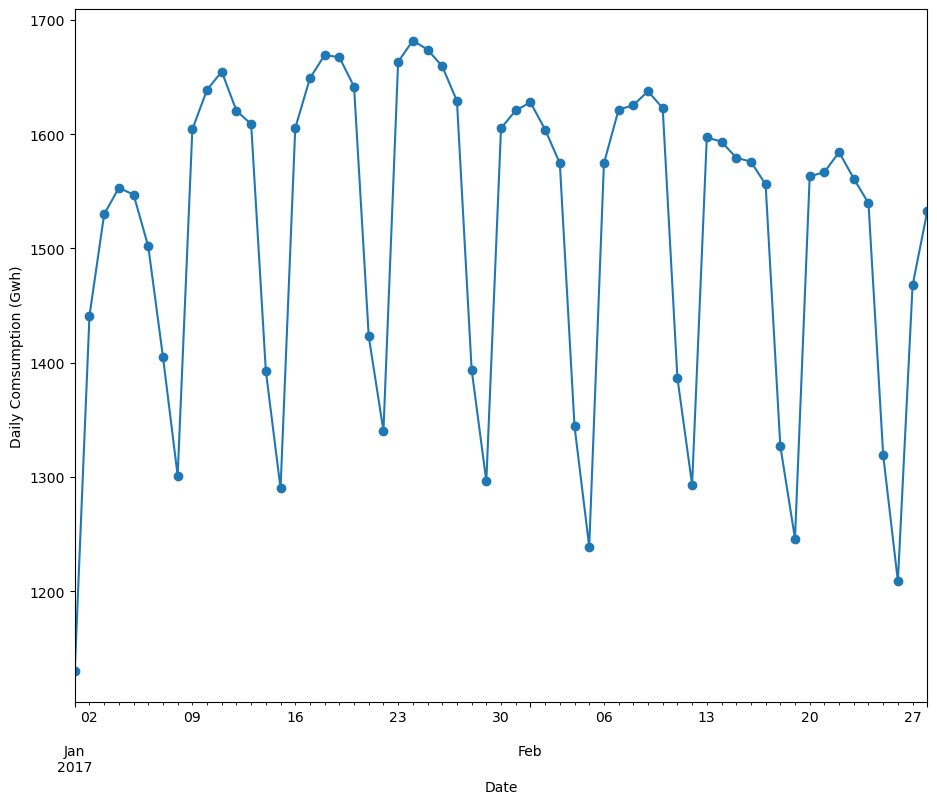

In [70]:
# Melihat bulan januari dan februari
ax = opsd_daily.loc['2017-01':'2017-02','Consumption'].plot(marker='o',linestyle='-',figsize=(11,9))
ax.set_ylabel('Daily Comsumption (Gwh)')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

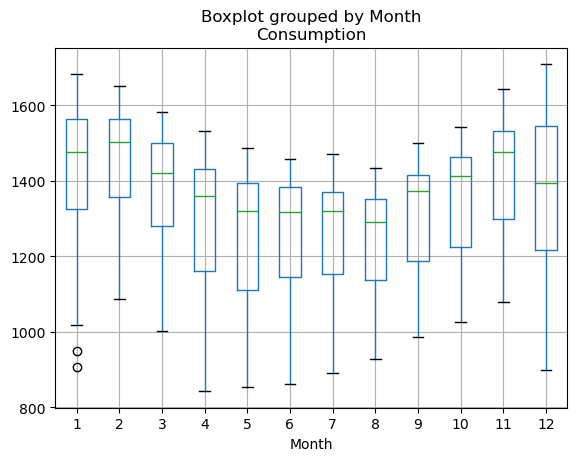

In [73]:
# Mengelompokkan data berdasarkan bulan dan memvisualisasikan yearly seasonality
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

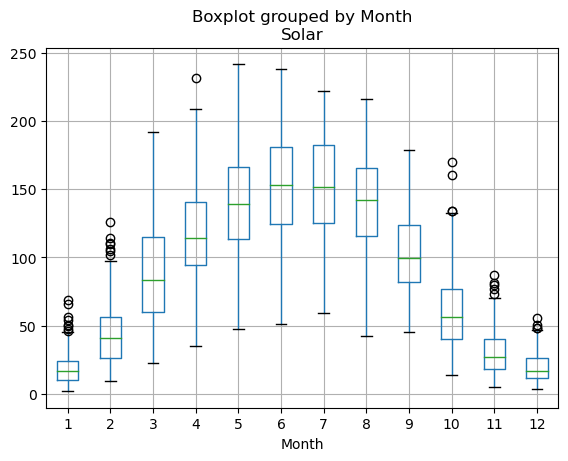

In [74]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

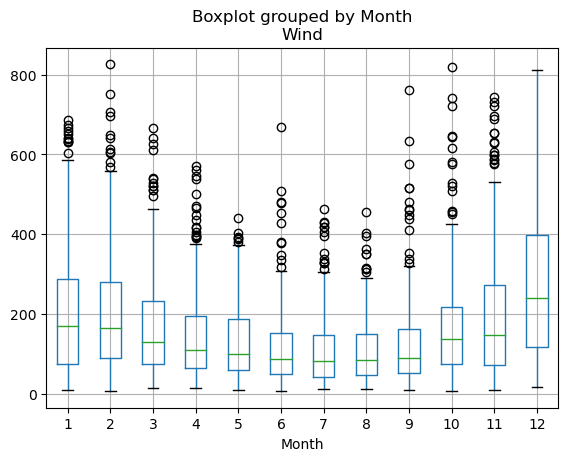

In [75]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

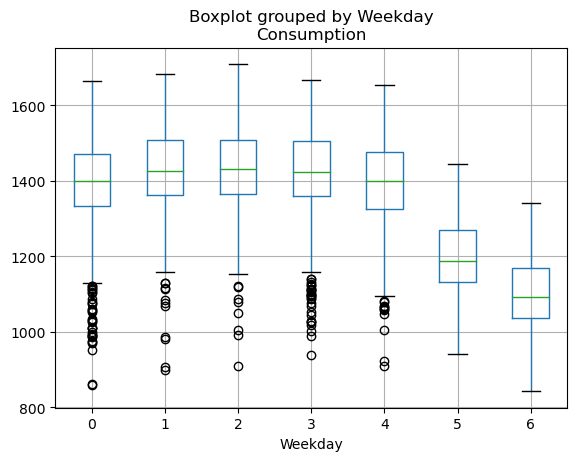

In [76]:
# Mengelompokkan data berdasarkan minggu dan memvisualisasikan yearly seasonality
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

In [77]:
## Resample data menjadi weekly mean time series
data_columns =['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [78]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<AxesSubplot:xlabel='Date'>

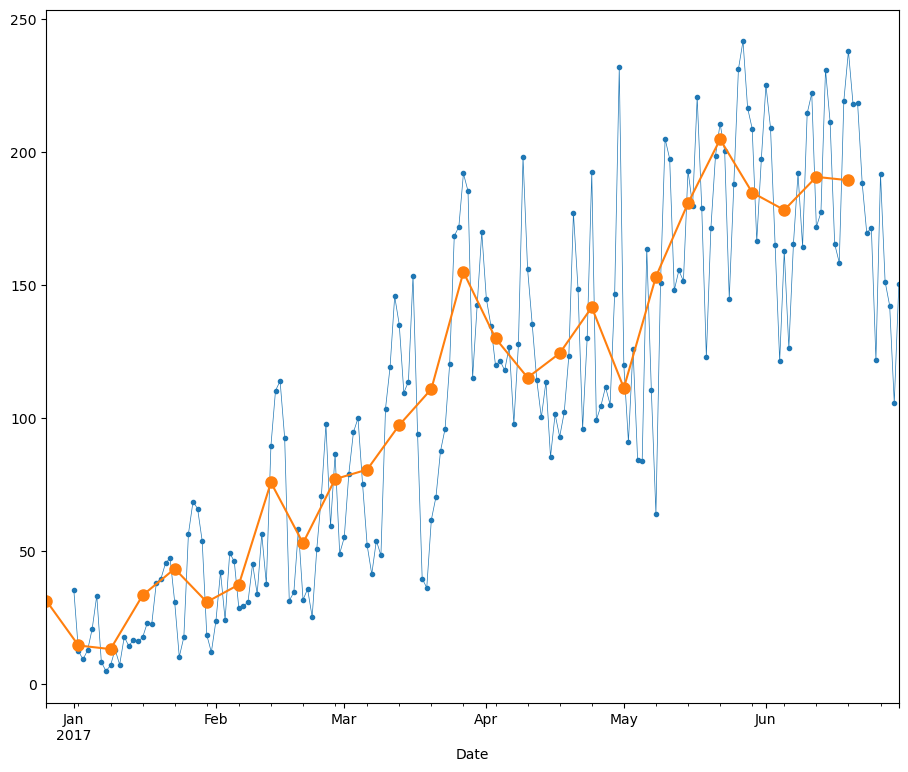

In [81]:
# Merangkai waktu solar harian dan mingguan

start, end = '2017-01', '2017-06'
opsd_daily.loc[start : end,'Solar'].plot(marker='.',linestyle='-',linewidth = 0.5, figsize=(11,9))
opsd_weekly_mean.loc[start : end,'Solar'].plot(marker='o',markersize=8, linestyle='-', figsize=(11,9))